['data/test/origin/image\\mouse\\test_01.png', 'data/test/origin/image\\mouse\\test_02.png', 'data/test/origin/image\\mouse\\test_03.png', 'data/test/origin/image\\mouse\\test_04.png', 'data/test/origin/image\\mouse\\test_05.png', 'data/test/origin/image\\mouse\\test_06.png', 'data/test/origin/image\\mouse\\test_07.png', 'data/test/origin/image\\mouse\\test_08.png', 'data/test/origin/image\\mouse\\test_09.png', 'data/test/origin/image\\mouse\\test_10.png', 'data/test/origin/image\\mouse\\test_11.png', 'data/test/origin/image\\mouse\\test_12.png', 'data/test/origin/image\\mouse\\test_13.png', 'data/test/origin/image\\mouse\\test_14.png', 'data/test/origin/image\\mouse\\test_15.png']


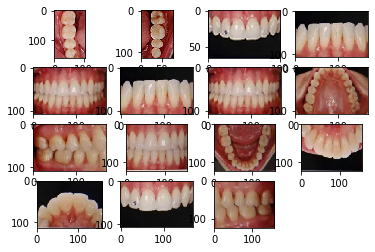

Found 15 images belonging to 1 classes.
['data/test/stardand/image\\mouse\\mouse_gen_0_749807.png', 'data/test/stardand/image\\mouse\\mouse_gen_1_3037478.png', 'data/test/stardand/image\\mouse\\mouse_gen_2_4784841.png', 'data/test/stardand/image\\mouse\\mouse_gen_3_113033.png', 'data/test/stardand/image\\mouse\\mouse_gen_4_5796605.png', 'data/test/stardand/image\\mouse\\mouse_gen_5_8779734.png', 'data/test/stardand/image\\mouse\\mouse_gen_6_6560218.png', 'data/test/stardand/image\\mouse\\mouse_gen_7_2242505.png', 'data/test/stardand/image\\mouse\\mouse_gen_8_3651275.png', 'data/test/stardand/image\\mouse\\mouse_gen_9_7811459.png', 'data/test/stardand/image\\mouse\\mouse_gen_10_4061522.png', 'data/test/stardand/image\\mouse\\mouse_gen_11_3824074.png', 'data/test/stardand/image\\mouse\\mouse_gen_12_6188001.png', 'data/test/stardand/image\\mouse\\mouse_gen_13_6559563.png', 'data/test/stardand/image\\mouse\\mouse_gen_14_5566381.png', 'data/test/stardand/image\\mouse\\original_0.png']


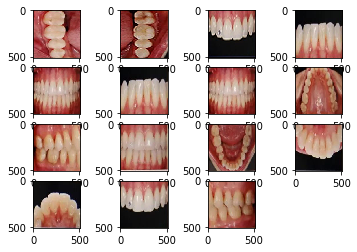

In [2]:
import matplotlib.pyplot as  plt
import os, glob
from PIL import Image
from keras.preprocessing import image
 
def print_result(path, sortKey):
    if (sortKey == 'filename'):
        name_list = sorted(glob.glob(path))
    elif (sortKey == 'ctime'):
        name_list = sorted(glob.glob(path), key=os.path.getctime)
    elif (sortKey == 'mtime'):
        name_list = sorted(glob.glob(path), key=os.path.getmtime)
    else:
        name_list = glob.glob(path)
    fig = plt.figure()
    for i in range(image_num):
        img = Image.open(name_list[i])
        # 打印子图，add_subplot(331) 参数一：子图总行数，参数二：子图总列数，参数三：子图位置
        row = int(image_num ** 0.5)
        if (not row*row == image_num):
            row = row+1
        col = row
        sub_img = fig.add_subplot(row,col,1 + i)
        sub_img.imshow(img)
    plt.show()
    return fig
 
def execute_generate():
    # 打印图片列表
    name_list = sorted(glob.glob(path + '*/*'))
    print(name_list)
    # ['train/image\\mouth\\1.png', 'train/image\\mouth\\2.png', 'train/image\\mouth\\3.png', 'train/image\\mouth\\4.png', 'train/image\\mouth\\5.png', 'train/image\\mouth\\6.png', 'train/image\\mouth\\7.png', 'train/image\\mouth\\8.png', 'train/image\\mouth\\9.png']

    # 打印原始图的子图列表
    fig = print_result(path + '*/*', 'filename')

    # 原图
    datagen = image.ImageDataGenerator()
    gen_data = datagen.flow_from_directory(path, batch_size=1, shuffle=False, save_to_dir=gen_path ,
                                           save_prefix='mouth_gen', target_size=(512, 512))
    for i in range(image_num):
        gen_data.next()

    # 保存原始图的子图图片
    fig.savefig(gen_path + '/original_0.png', dpi=200, papertype='a5')

    name_list = sorted(glob.glob(gen_path + '*/*'), key=os.path.getmtime)
    print(name_list)

    # 打印生成的标准图的子图列表
    fig = print_result(gen_path + '/*', 'mtime')
    fig.savefig(gen_path + '/original_1.png', dpi=200, papertype='a5')



path = 'data/test/origin/image/'
gen_path = 'data/test/stardand/image/mouth'
image_num = 15

execute_generate()

